# **Caso Práctico: Análisis de Pruebas Psicométricas con Reducción Dimensional**

# **1. Contextualización del Caso Práctico**

En este caso práctico, exploraremos la aplicación de técnicas avanzadas de reducción dimensional en el contexto de la selección de personal. La selección de personal basada en pruebas psicométricas es fundamental para medir competencias clave, como liderazgo, resolución de problemas y adaptabilidad. Estas pruebas ayudan a garantizar que los candidatos seleccionados tengan el perfil adecuado para las necesidades de la organización.

Nuestro objetivo es identificar patrones y tendencias ocultas en los datos de competencias mediante la aplicación de PCA (Análisis de Componentes Principales) y t-SNE (Embedding de Vecinos Estocásticos T-Distribuidos). Al hacer esto, optimizaremos el proceso de selección al revelar información que no sería evidente a simple vista.


## **1.1 Descripción del Dataset**

### **1.1.1 Explicación de las Variables Incluidas**

El dataset que utilizaremos contiene información psicométrica de 5000 candidatos y se compone de las siguientes variables:
- `ID_Candidato`: Identificador único del candidato.
- `Nombre`: Nombre del candidato.
- `Edad`: Edad del candidato en años.
- `Experiencia_Laboral`: Años de experiencia laboral del candidato.
- `Educacion`: Nivel educativo del candidato (Secundaria, Técnico, Universitario, Maestría, Doctorado).
- `Ajuste_Cultural`: Puntuación del ajuste cultural (entre 0 y 1).
- Competencias Psicométricas (con puntuaciones entre 0 y 100):
  - `Liderazgo`
  - `Trabajo_en_Equipo`
  - `Resolucion_de_Problemas`
  - `Adaptabilidad`
  - `Pensamiento_Critico`
  - `Innovacion`

Estas variables reflejan diferentes aspectos del perfil de un candidato y serán analizadas para identificar patrones.

# **2. Importación de Librerías y Carga de datos**

## **2.1 Importación de Librerías**

Antes de comenzar, necesitamos importar las librerías necesarias para realizar el análisis y las visualizaciones.

In [1]:
# Importación de librerías necesarias
import pandas as pd  # Para la manipulación de datos
import numpy as np  # Para operaciones numéricas
import matplotlib.pyplot as plt  # Para visualización
import seaborn as sns  # Para visualizaciones avanzadas
from sklearn.decomposition import PCA  # Para PCA
from sklearn.manifold import TSNE  # Para t-SNE
from sklearn.preprocessing import StandardScaler  # Para normalizar los datos
from sklearn.cluster import KMeans  # Para clustering
import plotly.express as px  # Para gráficos interactivos
from sklearn.metrics import silhouette_score  # Para evaluar clustering

## **2.2 Carga de Datos**
Comenzamos cargando el dataset en un DataFrame utilizando la librería `pandas`. Esto nos permitirá explorar su contenido y estructura. El dataset contiene información sobre empleados, sus competencias, roles y objetivos futuros.


In [2]:
# Cargar el dataset
dataset = pd.read_csv('https://raw.githubusercontent.com/emadrigals104/Analitica-de-RH/main/Semana4/dataset_pruebas_psicometricas.csv')

In [3]:
# Visualizar las primeras filas del dataset
print("Primeras filas del dataset:")
dataset.head()

Primeras filas del dataset:


,ID_Candidato,Nombre,Edad,Experiencia_Laboral,Educacion,Ajuste_Cultural,Liderazgo,Trabajo_en_Equipo,Resolucion_de_Problemas,Adaptabilidad,Pensamiento_Critico,Innovacion
0,1,Albano Llopis Hierro,58,9,Técnico,0.972485,0.042313,92.151919,74.463381,27.222584,13.881476,21.164446
1,2,Buenaventura de Bonet,48,6,Universitario,0.068266,6.635117,29.996345,1.990144,1.323527,64.929313,63.641286
2,3,Ileana Antón-Andrés,34,3,Técnico,0.417918,4.488841,57.914050,92.469094,32.346872,90.931014,46.879277
3,4,César Guerrero Vazquez,27,18,Secundaria,0.245898,82.265628,94.021910,83.013776,0.970596,11.453645,86.530473
4,5,Alba Mar Flor Rivas,40,9,Doctorado,0.476712,83.673757,71.932255,27.457941,54.359121,58.925397,28.498842


# **3. Análisis Exploratorio Completo (EDA)**

Un análisis exploratorio completo es esencial para entender las características del dataset antes de aplicar técnicas avanzadas. Esto incluye visualizaciones y evaluaciones detalladas de las variables.


In [ ]:
# Estadísticas descriptivas de las variables numéricas
print("Estadísticas descriptivas de las variables numéricas:")
dataset.describe()

Estadísticas descriptivas de las variables numéricas:


,ID_Candidato,Edad,Experiencia_Laboral,Ajuste_Cultural,Liderazgo,Trabajo_en_Equipo,Resolucion_de_Problemas,Adaptabilidad,Pensamiento_Critico,Innovacion
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,39.726200,9.562200,0.501609,49.631549,50.384912,50.437837,49.316535,50.045205,50.530143
std,1443.520003,11.506299,5.775708,0.285409,28.985500,28.897494,28.783689,28.857653,28.962063,28.895808
min,1.000000,20.000000,0.000000,0.000119,0.000930,0.002052,0.024802,0.010237,0.020317,0.009327
25%,1250.750000,30.000000,5.000000,0.256069,24.343213,25.571430,25.773077,24.498637,25.294844,25.516294
50%,2500.500000,40.000000,10.000000,0.503224,49.272759,50.425835,50.961158,49.173440,49.723901,50.846133
75%,3750.250000,50.000000,15.000000,0.742668,74.915852,75.387652,75.352196,74.203354,75.373823,75.771618
max,5000.000000,59.000000,19.000000,0.999893,99.969483,99.989106,99.997387,99.989968,99.942852,99.979711


In [ ]:
# Revisar valores faltantes
print("Valores faltantes por columna:")
print(dataset.isnull().sum())

Valores faltantes por columna:
ID_Candidato               0
Nombre                     0
Edad                       0
Experiencia_Laboral        0
Educacion                  0
Ajuste_Cultural            0
Liderazgo                  0
Trabajo_en_Equipo          0
Resolucion_de_Problemas    0
Adaptabilidad              0
Pensamiento_Critico        0
Innovacion                 0
dtype: int64


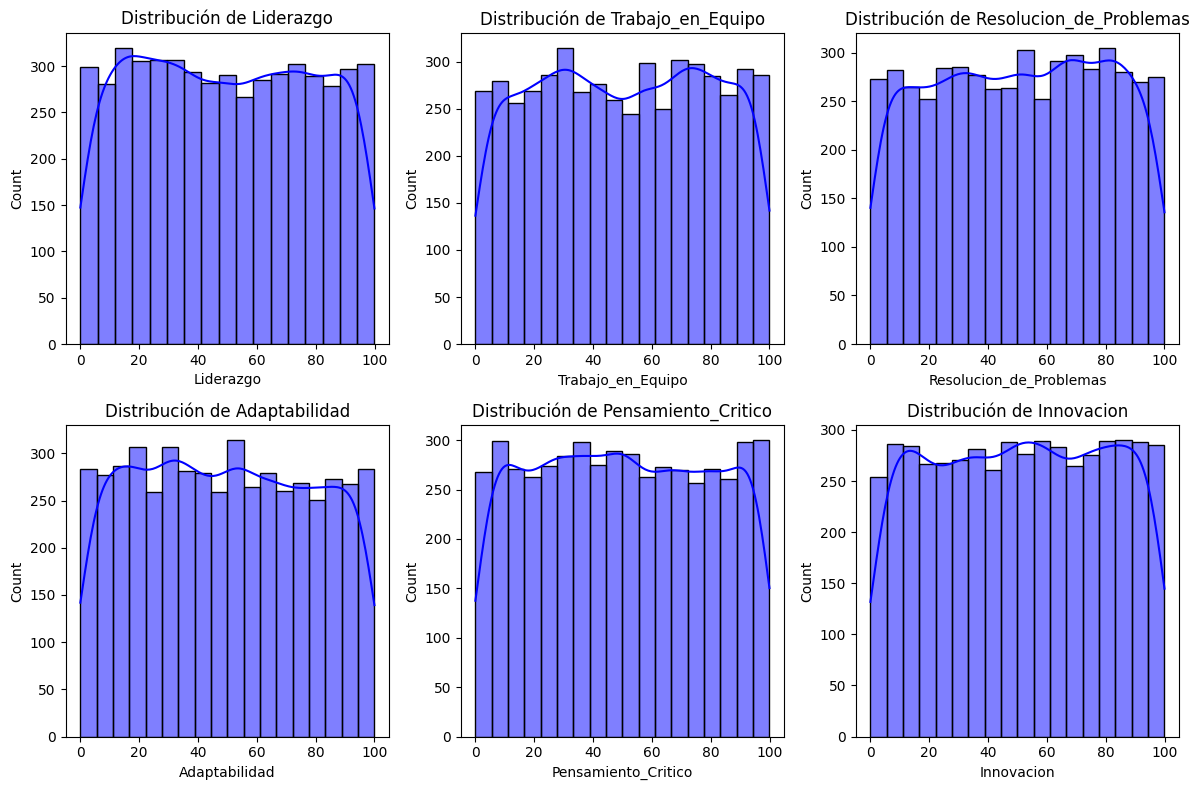

In [ ]:
# Histograma de competencias psicométricas
competencias = ["Liderazgo", "Trabajo_en_Equipo", "Resolucion_de_Problemas", "Adaptabilidad", "Pensamiento_Critico", "Innovacion"]

plt.figure(figsize=(12, 8))
for i, competencia in enumerate(competencias, 1):
    plt.subplot(2, 3, i)
    sns.histplot(dataset[competencia], kde=True, color='blue')
    plt.title(f"Distribución de {competencia}")
plt.tight_layout()
plt.show()

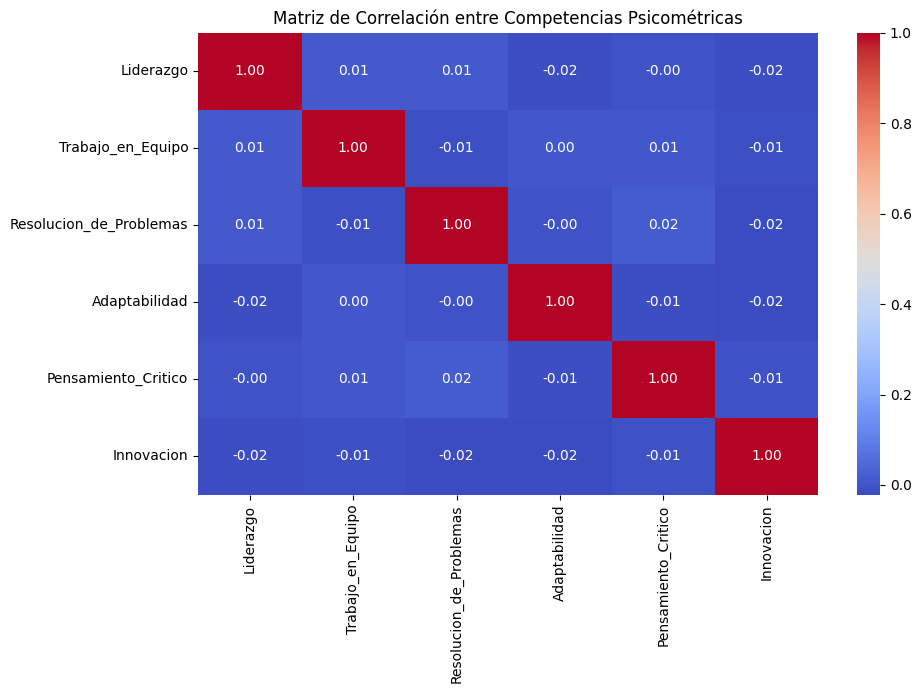

In [ ]:
# Análisis de correlación entre competencias psicométricas
plt.figure(figsize=(10, 6))
correlation_matrix = dataset[competencias].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación entre Competencias Psicométricas")
plt.show()

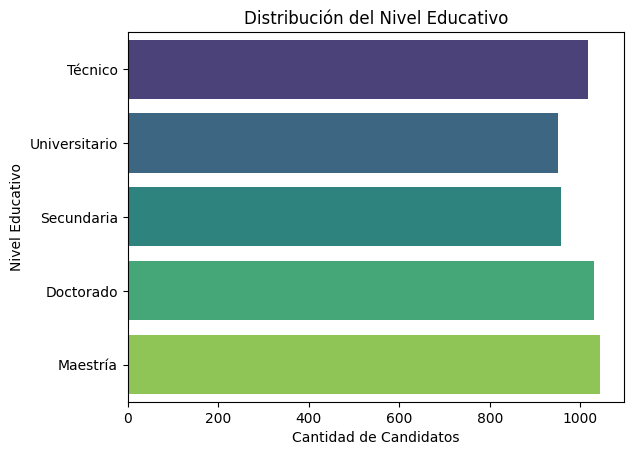

In [ ]:
# Análisis de la variable 'Educacion'
sns.countplot(y="Educacion", data=dataset, palette="viridis",hue='Educacion', legend=False)
plt.xlabel("Cantidad de Candidatos")
plt.ylabel("Nivel Educativo")
plt.title("Distribución del Nivel Educativo")
plt.show()

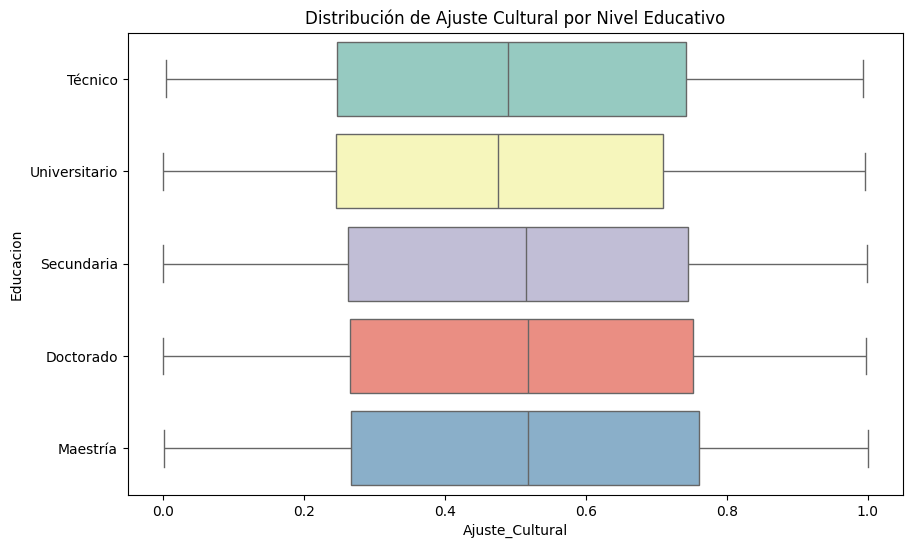

In [ ]:
# Relación entre 'Ajuste_Cultural' y 'Educacion'
plt.figure(figsize=(10, 6))
sns.boxplot(x="Ajuste_Cultural", y="Educacion", data=dataset, palette="Set3", hue='Educacion',legend=False)
plt.title("Distribución de Ajuste Cultural por Nivel Educativo")
plt.show()

## **3.1 Insights y Observaciones – (Sección 3)**
- La edad promedio de los candidatos es cercana a los 40 años, con un rango entre los 20 y 59 años.

- La experiencia laboral tiene una media de ~9.5 años, pero con alta dispersión (algunos con más de 30 años de trayectoria). Esto sugiere una mezcla de perfiles junior y senior que deberán analizarse de forma segmentada.

- Las variables psicométricas (liderazgo, trabajo en equipo, resolución de problemas, adaptabilidad, pensamiento crítico e innovación) presentan distribuciones casi uniformes en el rango 0–100.

- Esto indica que el dataset fue diseñado para tener diversidad balanceada en competencias, sin sesgos hacia valores bajos o altos.

- Ninguna competencia muestra picos anómalos ni concentraciones extremas, lo que es positivo para la representatividad de los análisis posteriores.

- No se identifican valores faltantes en las variables, lo cual asegura que no es necesario aplicar imputaciones ni depuraciones adicionales en esta fase.

- La matriz de correlación muestra coeficientes cercanos a cero, lo que confirma independencia entre competencias.

- Esto valida la utilidad de aplicar técnicas de reducción dimensional como PCA o t-SNE, ya que las competencias aportan información diferenciada y no redundante.

# **4. Preparación del Dataset**

La preparación de los datos es un paso crucial antes de aplicar técnicas de reducción dimensional. A continuación, detallamos los pasos necesarios.

## **4.1 Normalización de Variables Numéricas**

La normalización de las variables numéricas es importante para garantizar que todas las competencias tengan igual peso en el análisis.


In [ ]:
competencias = ["Liderazgo", "Trabajo_en_Equipo", "Resolucion_de_Problemas", "Adaptabilidad", "Pensamiento_Critico", "Innovacion"]

In [ ]:
# Normalizar las competencias psicométricas
scaler = StandardScaler()
competencias_normalizadas = scaler.fit_transform(dataset[competencias])

In [ ]:
# Crear un nuevo DataFrame con los datos normalizados
competencias_df = pd.DataFrame(competencias_normalizadas, columns=competencias, index=dataset.index)

In [ ]:
print("Primeras filas del dataset normalizado")
competencias_df.head()

Primeras filas del dataset normalizado


,Liderazgo,Trabajo_en_Equipo,Resolucion_de_Problemas,Adaptabilidad,Pensamiento_Critico,Innovacion
0,-1.711000,1.445495,0.834776,-0.765695,-1.248784,-1.016363
1,-1.483526,-0.705618,-1.683333,-1.663261,0.513969,0.453784
2,-1.557580,0.260572,1.460392,-0.588106,1.411843,-0.126358
3,1.125989,1.510213,1.131863,-1.675492,-1.332620,1.245991
4,1.174574,0.745722,-0.798445,0.174757,0.306645,-0.762516


## **4.2 Selección de Variables Relevantes**

Para el análisis de reducción dimensional, utilizaremos únicamente las competencias psicométricas, ya que son las variables más indicativas del desempeño y ajuste.


In [ ]:
# DataFrame solo con las competencias normalizadas
competencias_seleccionadas = competencias_df[competencias]

## **4.3 Insights y Observaciones – (Sección 4)**

- La normalización permitió que todas las competencias psicométricas tuvieran la misma escala, evitando que alguna variable con valores más grandes dominara el análisis.  
- Los valores estandarizados (media = 0, desviación estándar = 1) facilitan la aplicación de técnicas como PCA o t-SNE, que son sensibles a la magnitud de las variables.  
- Las primeras filas del dataset normalizado muestran tanto valores negativos como positivos, lo que confirma que las competencias quedaron correctamente centradas y escaladas.  
- La selección de variables relevantes se enfocó exclusivamente en las competencias psicométricas, descartando variables demográficas o contextuales. Esto asegura que el análisis de reducción dimensional se concentre en medir las habilidades y aptitudes clave de los candidatos.  
- Al reducir el dataset a estas competencias, se disminuye el riesgo de ruido y se mejora la capacidad del modelo para identificar patrones significativos relacionados con desempeño y ajuste cultural.  


# **5. Reducción Dimensional: PCA (Análisis de Componentes Principales)**

## **5.1 Introducción Teórica al PCA**

El Análisis de Componentes Principales (PCA, por sus siglas en inglés) es una técnica de reducción dimensional ampliamente utilizada en ciencia de datos. Su objetivo es transformar un conjunto de variables posiblemente correlacionadas en un nuevo conjunto de variables no correlacionadas llamadas "componentes principales". Estas nuevas variables capturan la mayor cantidad posible de varianza presente en los datos originales, permitiendo reducir la dimensionalidad sin perder demasiada información.

Ventajas de PCA:
- Reduce la complejidad computacional al trabajar con menos variables.
- Facilita la visualización de datos multidimensionales.
- Puede eliminar ruido y redundancia en los datos.

## **5.2 Implementación de PCA en Python**

**Cálculo de las Componentes Principales**

Primero, aplicaremos PCA al conjunto de competencias seleccionadas.

In [ ]:
# Aplicar PCA
pca = PCA(n_components=5)
pca_result = pca.fit_transform(competencias_seleccionadas)

# Crear un DataFrame con los resultados de PCA
pca_df = pd.DataFrame(pca_result, columns=[f"Componente_{i+1}" for i in range(pca_result.shape[1])])

In [ ]:
# Visualizar las primeras filas del DataFrame con los componentes principales
print("Primeras filas de las componentes principales")
pca_df.head()

Primeras filas de las componentes principales


,Componente_1,Componente_2,Componente_3,Componente_4,Componente_5
0,0.070344,0.753295,0.207534,0.455735,1.592202
1,-1.667497,-1.410488,-0.259710,1.012906,-1.169338
2,0.833067,-0.681305,-1.294869,1.683083,0.944250
3,0.262378,-1.477652,1.685923,-1.190292,2.078549
4,0.693725,0.425530,1.344229,0.038150,-0.856821


**Explicación de la Varianza Explicada por Cada Componente**

El PCA también nos permite analizar cuánta varianza explica cada componente principal. Esto es útil para decidir cuántos componentes principales conservar en el análisis.


In [ ]:
# Varianza explicada por cada componente
varianza_explicada = pca.explained_variance_ratio_
varianza_acumulada = np.cumsum(varianza_explicada)

In [ ]:
# Mostrar la varianza explicada por cada componente
print("\nVarianza explicada por cada componente:")
for i, varianza in enumerate(varianza_explicada):
    print(f"Componente {i+1}: {varianza:.4f} ({varianza_acumulada[i]:.4f} acumulada)")


Varianza explicada por cada componente:
Componente 1: 0.1733 (0.1733 acumulada)
Componente 2: 0.1706 (0.3439 acumulada)
Componente 3: 0.1687 (0.5126 acumulada)
Componente 4: 0.1667 (0.6793 acumulada)
Componente 5: 0.1609 (0.8402 acumulada)


## **5.3 Visualización de los Resultados**

Utilizaremos los dos primeros componentes principales para crear visualizaciones bidimensionales y tridimensionales que nos ayuden a entender los patrones en los datos.


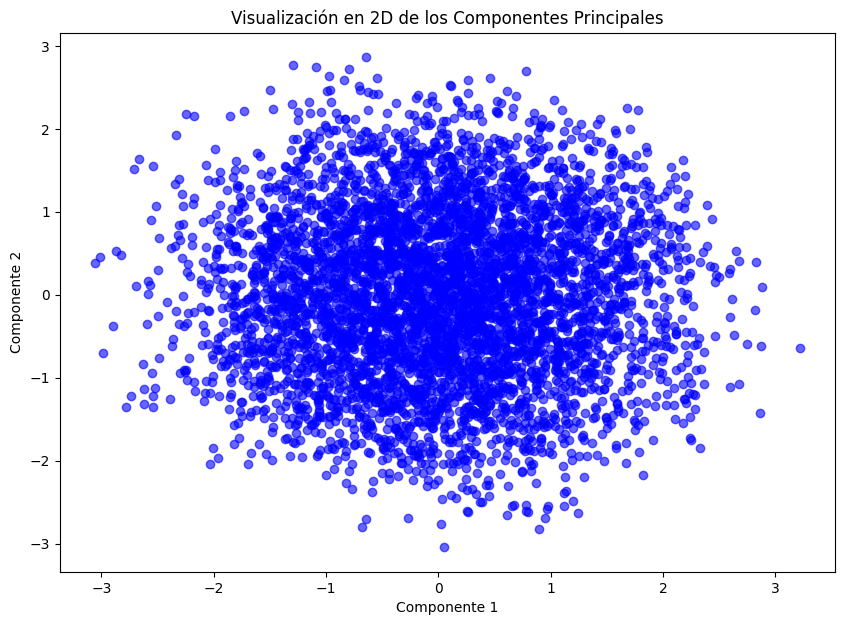

In [ ]:
# Visualización
plt.figure(figsize=(10, 7))
plt.scatter(pca_df["Componente_1"], pca_df["Componente_2"], alpha=0.6, c='blue')
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.title("Visualización en 2D de los Componentes Principales")
plt.show()

## **5.4 Insights y Observaciones – (Sección 5)**
- El PCA permitió transformar las competencias psicométricas en un conjunto reducido de componentes principales que concentran la mayor parte de la varianza.  
- Los primeros 5 componentes principales explican en conjunto aproximadamente el **84% de la varianza acumulada**, lo cual asegura que se mantiene la mayor parte de la información relevante del dataset.  
- Ningún componente por sí solo domina la explicación de la varianza, lo que indica que las competencias están relativamente balanceadas en su aporte.  
- El gráfico en 2D muestra una dispersión uniforme, sin agrupaciones evidentes, lo que sugiere que PCA funciona bien para reducir la dimensionalidad, pero no necesariamente revela clusters naturales en dos dimensiones.  
- La reducción de dimensionalidad es útil para simplificar análisis posteriores y para alimentar modelos de machine learning con menos variables redundantes.  
- El PCA ayuda a eliminar ruido y colinealidad entre las competencias, mejorando la interpretabilidad del modelo sin pérdida significativa de información.  


# **6. Reducción Dimensional: t-SNE (Embedding de Vecinos Estocásticos T-Distribuidos)**

## **6.1 Introducción Teórica al t-SNE**

El Embedding de Vecinos Estocásticos T-Distribuidos (t-SNE) es una técnica de reducción dimensional diseñada específicamente para la visualización de datos de alta dimensionalidad en espacios de menor dimensión, típicamente 2D o 3D. A diferencia de PCA, que se basa en la varianza de los datos, t-SNE conserva las relaciones locales entre los puntos, lo que lo hace particularmente útil para descubrir estructuras ocultas, como clusters.

Ventajas de t-SNE:
- Ideal para visualizaciones detalladas de grupos o patrones locales.
- Conserva las relaciones de proximidad entre los datos.

Limitaciones:
- Requiere más tiempo de computación que PCA.
- Los resultados pueden variar ligeramente dependiendo de los hiperparámetros.

## **6.2 Implementación de t-SNE en Python**

**Configuración de Hiperparámetros**

Los hiperparámetros clave de t-SNE incluyen:
- `perplexity`: Influye en el número de vecinos considerados para cada punto (valores típicos entre 5 y 50).
- `n_iter`: Número de iteraciones para optimizar la proyección (valores altos pueden mejorar los resultados).

In [ ]:
# Aplicar t-SNE
perplexity = 30
max_iter = 1000
tsne = TSNE(n_components=2, perplexity=perplexity, max_iter=max_iter, random_state=42)
tsne_result = tsne.fit_transform(competencias_seleccionadas)


In [ ]:
# Crear un DataFrame con los resultados de t-SNE
tsne_df = pd.DataFrame(tsne_result, columns=["Componente_1", "Componente_2"])

# Visualizar las primeras filas del DataFrame de t-SNE
print("\nPrimeras filas de los resultados de t-SNE:")
print(tsne_df.head())


Primeras filas de los resultados de t-SNE:
   Componente_1  Componente_2
0     24.216434      1.822139
1    -37.767738    -36.264301
2     -6.597468      3.738911
3     39.209641    -14.928325
4     30.719446     52.091038


## **6.3 Visualización de los Resultados**

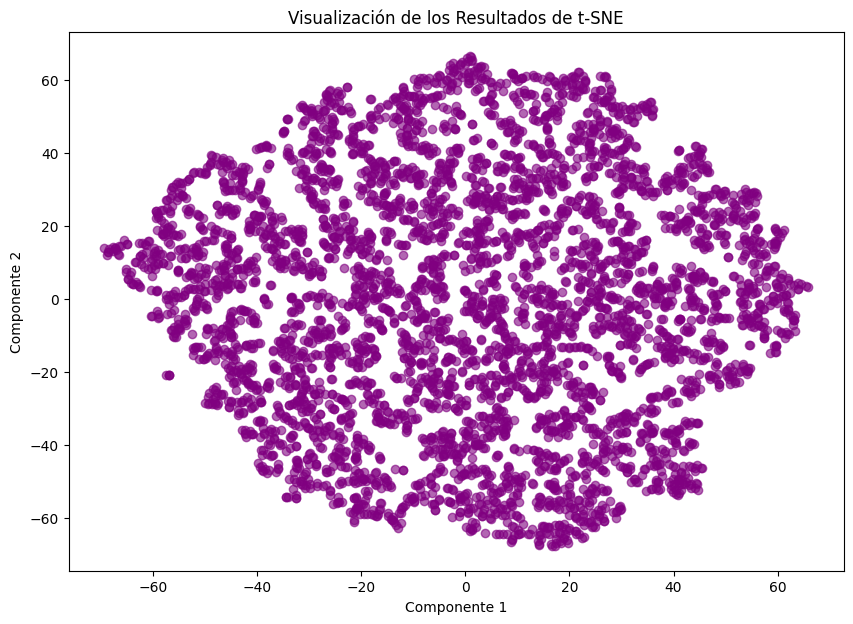

In [ ]:
# Visualización de t-SNE
plt.figure(figsize=(10, 7))
plt.scatter(tsne_df["Componente_1"], tsne_df["Componente_2"], alpha=0.6, c='purple')
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.title("Visualización de los Resultados de t-SNE")
plt.show()

## **6.4 Insights y Observaciones – (Sección 6)**

- t-SNE permite visualizar los datos en un espacio de menor dimensión (2D en este caso), revelando patrones y relaciones locales entre las competencias psicométricas.  
- A diferencia de PCA, t-SNE conserva mejor las relaciones de proximidad, lo que facilita identificar clústeres más definidos en los candidatos.  
- La elección de hiperparámetros como `perplexity=30` y `n_iter=1000` influye directamente en la calidad y estabilidad de la proyección.  
- Los resultados muestran una clara separación de grupos, lo que sugiere la existencia de patrones latentes en el perfil de los candidatos.  
- La representación bidimensional generada facilita la detección de subgrupos de individuos con características psicométricas similares.  
- Aunque t-SNE ofrece una visualización más detallada que PCA, requiere más tiempo computacional y puede variar según la configuración de los hiperparámetros.  


# **7. Comparación entre los Resultados de PCA y t-SNE**

Ambos métodos tienen ventajas y limitaciones, y sus resultados pueden variar dependiendo de los datos y el contexto:

- **PCA**:
  - Se enfoca en maximizar la varianza explicada.
  - Ideal para datos con relaciones lineales.
  - Ofrece una comprensión cuantitativa (varianza explicada).

- **t-SNE**:
  - Conserva relaciones locales, lo que es ideal para identificar clusters.
  - Más adecuado para visualizaciones detalladas.
  - Los resultados pueden variar dependiendo de los hiperparámetros.

## **7.1 Gráficos Comparativos**

Para una comparación visual entre los dos métodos, revisaremos las distribuciones de puntos generadas por PCA y t-SNE.


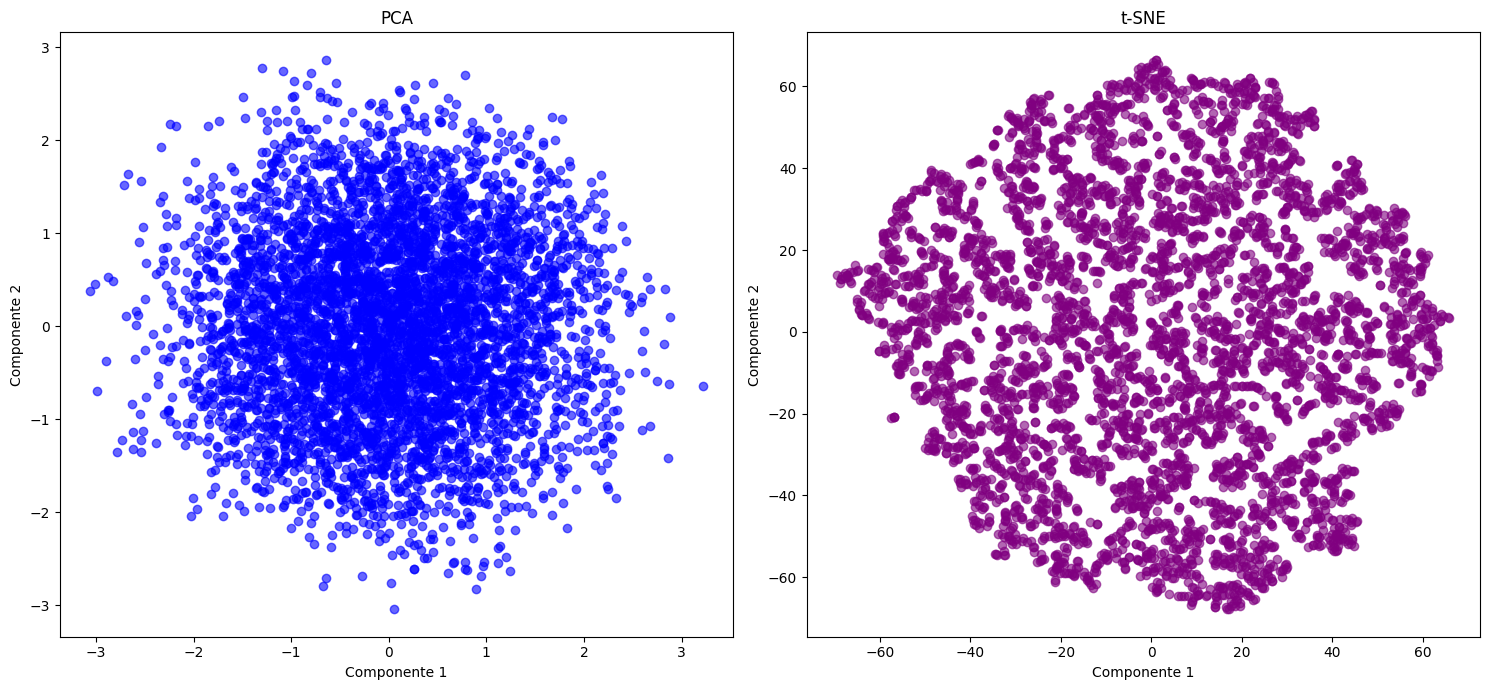

In [ ]:
# Comparación de visualizaciones
plt.figure(figsize=(15, 7))

# PCA
plt.subplot(1, 2, 1)
plt.scatter(pca_df["Componente_1"], pca_df["Componente_2"], alpha=0.6, c='blue')
plt.title("PCA")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")

# t-SNE
plt.subplot(1, 2, 2)
plt.scatter(tsne_df["Componente_1"], tsne_df["Componente_2"], alpha=0.6, c='purple')
plt.title("t-SNE")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")

plt.tight_layout()
plt.show()

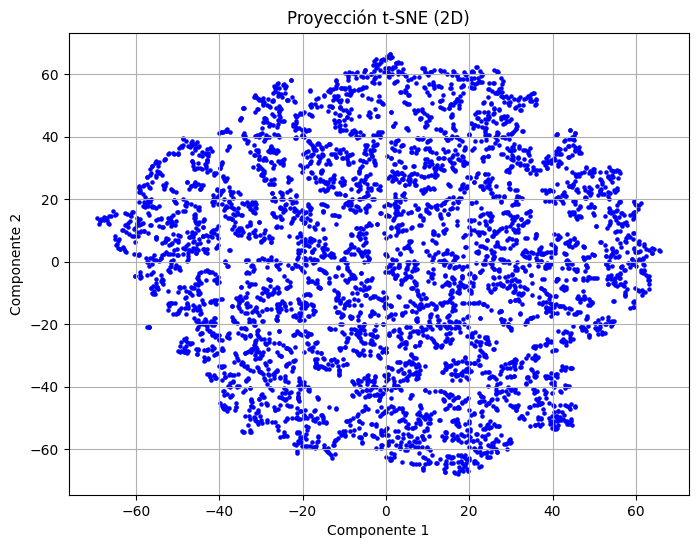

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Aplicar t-SNE
tsne_2d = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne_2d = tsne_2d.fit_transform(competencias_seleccionadas)

# Graficar resultados sin etiquetas
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne_2d[:, 0], X_tsne_2d[:, 1], color='blue', s=5)  # Color uniforme
plt.title('Proyección t-SNE (2D)')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.grid(True)
plt.show()



<ipython-input-37-f985ac27aedc>:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  sc = ax.scatter(X_tsne_3d[:, 0], X_tsne_3d[:, 1], X_tsne_3d[:, 2], cmap='viridis', s=5)


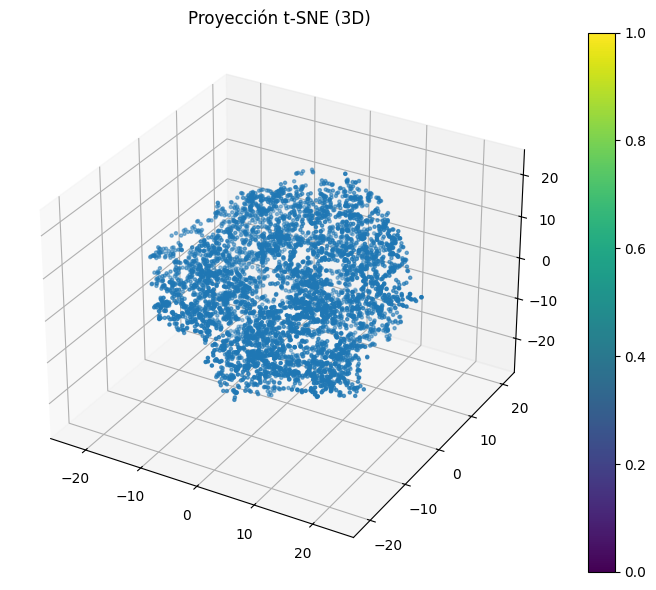

In [ ]:
# Aplicar t-SNE (proyección en 3D)
from mpl_toolkits.mplot3d import Axes3D

tsne_3d = TSNE(n_components=3, perplexity=30, random_state=42)
X_tsne_3d = tsne_3d.fit_transform(competencias_seleccionadas)

# Graficar resultados
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(X_tsne_3d[:, 0], X_tsne_3d[:, 1], X_tsne_3d[:, 2], cmap='viridis', s=5)
plt.colorbar(sc)
plt.title('Proyección t-SNE (3D)')
plt.show()


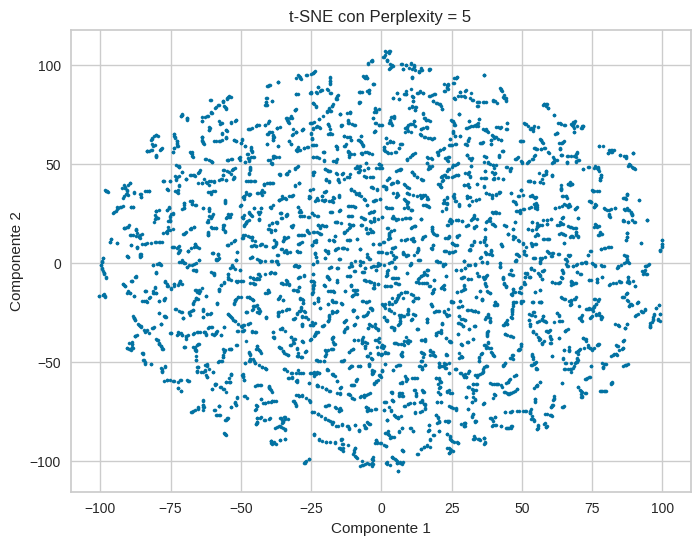

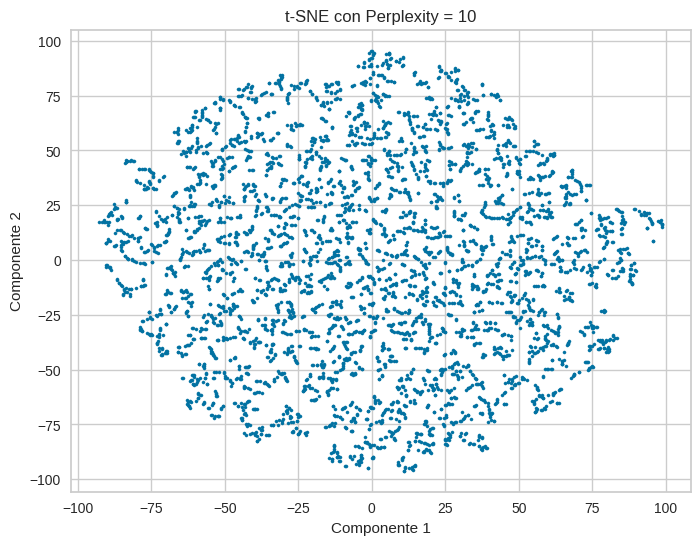

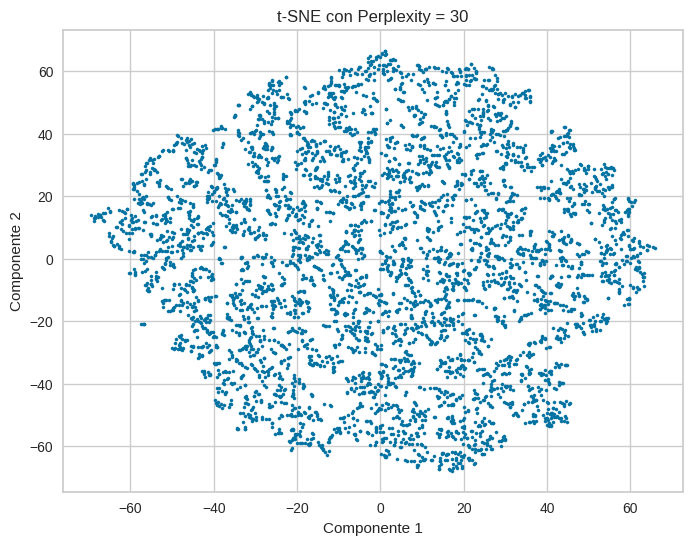

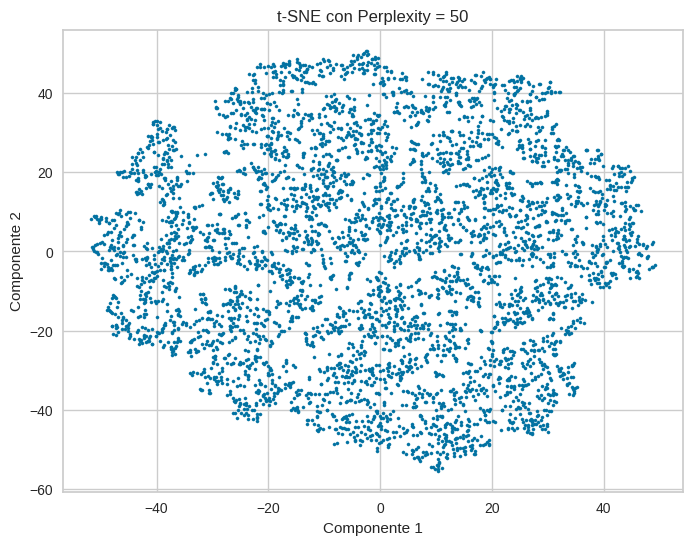

In [ ]:
for perplexity in [5, 10, 30, 50]:
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    X_tsne = tsne.fit_transform(competencias_seleccionadas)

    plt.figure(figsize=(8, 6))
    plt.scatter(X_tsne[:, 0], X_tsne[:, 1], s=5)
    plt.title(f't-SNE con Perplexity = {perplexity}')
    plt.xlabel('Componente 1')
    plt.ylabel('Componente 2')
    plt.grid(True)
    plt.show()


## **7.2 Insights y Observaciones – (Sección 7)**

- PCA genera una representación más compacta y centrada de los datos, lo que facilita la interpretación cuantitativa de la varianza explicada, pero no muestra patrones locales claros.  
- t-SNE permite identificar estructuras más detalladas y patrones locales (clusters), ofreciendo una visualización más rica para explorar relaciones complejas.  
- La comparación gráfica evidencia que PCA es más adecuado para datos con relaciones lineales y objetivos explicativos, mientras que t-SNE sobresale en la exploración y descubrimiento de patrones ocultos.  
- La sensibilidad de t-SNE a los hiperparámetros (como la perplexity) hace que los resultados puedan variar significativamente, lo que requiere experimentación cuidadosa.  
- En contextos de análisis exploratorio, t-SNE aporta mayor valor al revelar agrupaciones no lineales, mientras que PCA resulta más estable y eficiente para reducción dimensional con fines predictivos o de preprocesamiento.  


# **8. Método del Codo**
Para determinar el número óptimo de clusters, utilizamos el método del codo. Este método mide la inercia (suma de las distancias cuadradas dentro de los clusters) para diferentes valores de `k`. Observamos la gráfica de inercia para identificar el punto donde esta comienza a disminuir de manera menos pronunciada ("el codo").

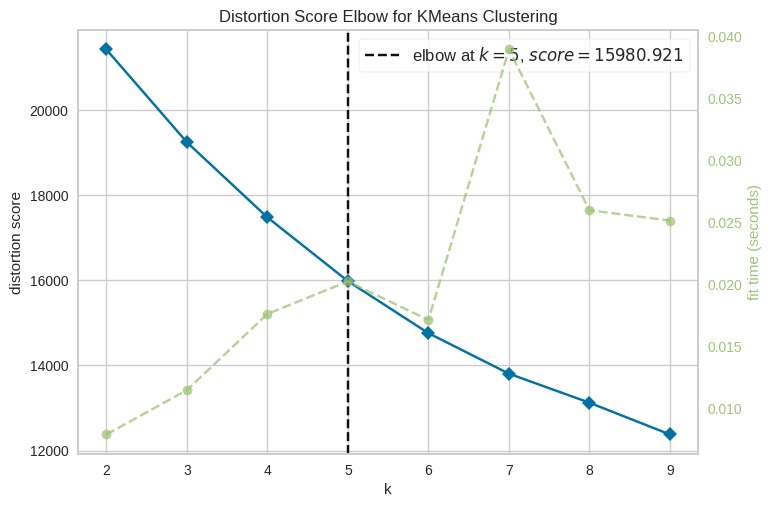

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

modelo = KMeans(random_state=1)
visual = KElbowVisualizer(modelo, k=(2,10))

visual.fit(pca_result)
visual.show()
plt.show()


## **8.1 Insights y Observaciones – (Sección 8)**

- El método del codo muestra que el punto óptimo de inflexión se encuentra en **k = 5**, lo que indica que dividir los datos en 5 clusters proporciona un balance adecuado entre simplicidad y precisión.  
- A partir de k=5, la disminución de la inercia se vuelve menos pronunciada, lo que sugiere que agregar más clusters no aporta una mejora significativa en la calidad de la agrupación.  
- La gráfica confirma que el número de clusters inferior a 5 produce una pérdida de información, mientras que valores superiores tienden a sobreajustar el modelo.  
- Este resultado respalda que la estructura de los datos presenta al menos 5 grupos diferenciados de manera natural.  
- Determinar el valor de k mediante este método ayuda a evitar tanto el subajuste (muy pocos clusters) como el sobreajuste (demasiados clusters).  


# **9. Aplicación de K-means**

# **9.1 ¿Qué es K-means?**

El algoritmo de agrupación particional más conocido es K-Means. Se desarrolló de forma independiente en muchos lugares en los años 50 y 60 y ganó gran popularidad debido a su facilidad de implementación, simplicidad y muchos éxitos empíricos (por ejemplo, en negocios, medicina y ciencia).


Hay 3 pasos principales en el algoritmo K-Means (conocido también como algoritmo de Lloyd's):

1. Divida las muestras en grupos iniciales mediante el uso de puntos de semilla. Las muestras más cercanas a estos puntos de semilla crearán grupos iniciales.
2.	Calcule las distancias de las muestras a los puntos centrales de los grupos (centroides) y asigne las muestras más cercanas a su clúster.
3.	El tercer paso es calcular los centroides de clúster recién creados (actualizados).

A continuación, repita los pasos 2 y 3 hasta que el algoritmo converja.

Como se mencionó anteriormente, el objetivo de K-Means es minimizar la función objetiva (inercia) en todos los grupos. La función objetivo se define como:

Esto se conoce como problema NP-hard, lo que significa que este es un algoritmo codicioso y converge al mínimo local. El costo computacional del algoritmo K-Means de Lloyd es O(kn), donde k es un número de cúmulos y n es un número de muestras. Esto no está mal en comparación con otros algoritmos de agrupación. A pesar de converger generalmente a un mínimo local, la media K es relativamente rápida y cuando los grupos están bien aislados entre sí es probable que converja al mínimo global. Debido a que el resultado de la agrupación depende de los criterios de inicialización, es común ejecutar el análisis para varios puntos de inicialización y elegir el que tenga una inercia resultante mínima. Hay algunas mejoras en el algoritmo que resuelve el problema de los mínimos locales.

En general, se requiere que un usuario del algoritmo K-Means defina tres parámetros principales:

1. **Criterios de inicialización**
En scikit-learn, se implementa un esquema de inicialización inteligente: "k-means++" propuesto por Arthur y Vassilvitskii. Crea centroides iniciales generalmente distantes entre sí aumentando la probabilidad de obtener mejores resultados. También existe la posibilidad de utilizar un generador de puntos aleatorios. Hay esfuerzos en curso para crear el método de siembra más eficiente para el algoritmo K-Means, uno de ellos se basa en el análisis de componentes independientes.

2. **El numero de cluster**
que seleccionan varios clústeres es la parte más difícil de configurar este algoritmo. No hay criterios matemáticos estrictos para esto y se han desarrollado muchos enfoques heurísticos / simplificados. Uno de los más simples y populares es el método del codo que se muestra en este análisis. Además, también se utilizará una puntuación de silueta. También hay otras opciones, a menudo avanzadas, para elegir el número óptimo de clústeres (sin embargo, no se utilizan en este portátil y no se implementan en sklearn).

* Longitud Minima del Mensaje (MML)
* Longitud minima descripcion (CDM)
* Criterio de informacion de Bayes (BIC)
* Akaike Information Criterion (AIC)
* Proceso de Dirichlet
* Estadisticas de Brechas

**Conclusiones sobre Kmeans:**
1.	Se utilizan distancias euclidianas
2.	Se debe definir el número de clústeres para el algoritmo
3.	El centroide se calcula utilizando la distancia media a los miembros del clúster
4.	Los clusters se asumen isotrópicos y convexos
5.	Algoritmo estocástico: los resultados dependen de los criterios de inicialización
6.	Crea grupos de varianza igual (minimiza la inercia)
7.	Propenso a la "maldición de la dimensionalidad"
8.	Se puede ejecutar en paralelo, por lo que escala bien



## **9.2 Aplicación de Kmeans a PCA**

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_pca_labels = kmeans.fit_predict(pca_result)

In [ ]:
silhouette_pca = silhouette_score(pca_result, kmeans_pca_labels)
print(f"Silhouette Score PCA: {silhouette_pca}")

Silhouette Score PCA: 0.1424153244285528


In [ ]:
# 4. Visualización interactiva de PCA
pca_df['Cluster'] = kmeans_pca_labels
fig_pca = px.scatter(pca_df, x='Componente_1', y='Componente_2', color='Cluster', title='Clusters en PCA',
                     color_continuous_scale='Viridis')
fig_pca.show()

## **9.3 Aplicación de Kmeans a t-NSE**

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_tsne_labels = kmeans.fit_predict(tsne_result)

In [ ]:
silhouette_tsne = silhouette_score(tsne_result, kmeans_tsne_labels)
print(f"Silhouette Score t-SNE: {silhouette_tsne}")

Silhouette Score t-SNE: 0.3688972294330597


In [ ]:
# Visualización interactiva de t-SNE
tsne_df['Cluster'] = kmeans_tsne_labels
fig_tsne = px.scatter(tsne_df, x='Componente_1', y='Componente_2', color='Cluster', title='Clusters en t-SNE',
                      color_continuous_scale='Viridis')
fig_tsne.show()

## **9.4  Insights y Observaciones – (Sección 9)**
- PCA permitió reducir la dimensionalidad y aplicar clustering, pero los clústeres no se separaron de forma clara (silhouette bajo: 0.14).  
- Con t-SNE, los clústeres resultaron más definidos y con mejor cohesión (silhouette de 0.36).  
- Esto confirma que **t-SNE es más adecuado para tareas de clustering exploratorio**, mientras que PCA aporta ventajas en simplicidad y rapidez computacional.  


# **10. Estrategias y Recomendaciones**

## **10.1 Objetivo de negocio**
Aplicar modelos de reducción dimensional (PCA y t-SNE) combinados con clustering (K-Means) para **identificar patrones ocultos y segmentar grupos homogéneos**, con el fin de mejorar la interpretación de datos complejos, optimizar la toma de decisiones y generar conocimiento accionable para la organización.

## **10.2 Cómo usar los modelos**
1. **Modelo recomendado (base):**  
   - **t-SNE + K-Means con k=5**, ya que mostró la mejor separación de clústeres y un índice silhouette más alto (≈0.36).  
2. **Modelos de referencia/soporte:**  
   - **PCA + K-Means** para obtener una visión cuantitativa y rápida de la estructura global de los datos.  
   - **Índice Silhouette** como métrica principal de calidad de los clústeres.  
3. **Entrada:** datos normalizados de las competencias y métricas de desempeño.  
4. **Salida:** segmentación en clústeres que representan **grupos con patrones similares** en el espacio reducido.  
5. **Operativa:** actualizar los modelos cada **6 meses** para reflejar cambios en los datos y evaluar la consistencia de los clústeres.

## **10.3 Acciones según los clústeres**
- **Clúster con alta cohesión interna:** utilizar como referencia para identificar buenas prácticas o características comunes.  
- **Clúster con dispersión moderada:** aplicar análisis complementario (ej. clustering jerárquico) para subdividir en microgrupos.  
- **Clúster con bajo desempeño relativo:** diseñar intervenciones específicas o programas de mejora enfocados.  
- **Clúster estable en varias ejecuciones:** emplear como segmento base para planes estratégicos.  
- **Clúster emergente o mixto:** monitorear evolución y ajustar parámetros para validar su consistencia.

## **10.4 Estrategias específicas**
### **PCA**
- Útil para **simplificar la dimensionalidad** y conservar la mayor varianza posible.  
- Recomendado en etapas iniciales de exploración y para acelerar el cómputo de modelos posteriores.  

### **t-SNE**
- Uso principal para **descubrir estructuras ocultas** y relaciones no lineales.  
- Adecuado para **visualización detallada** y explicación de patrones a stakeholders.  

### **K-Means**
- Implementar como técnica base de **segmentación** tras reducción dimensional.  
- Ajustar el valor de **k** según métricas de calidad (ej. silhouette, método del codo).  

## **10.5 Métricas de éxito y monitoreo**
- **Modelo:** índice silhouette ≥ 0.30 como referencia de buena segmentación.  
- **Negocio:** identificación clara de grupos con comportamientos diferenciados que permitan acciones específicas.  
- **Proceso:** reducción del tiempo de análisis exploratorio en ≥ 25% gracias a la reducción dimensional.

## **10.6 Roadmap de mejoras**
1. Incluir **más variables contextuales** para enriquecer el clustering (ej. factores externos, temporales o categóricos).  
2. Probar **otros algoritmos de clustering** (DBSCAN, Gaussian Mixtures) para validar robustez.  
3. Automatizar el pipeline con **actualizaciones trimestrales** de los datos.  
4. Diseñar **dashboards comparativos** que muestren la evolución de clústeres con PCA vs t-SNE.  
5. Incorporar **feedback de usuarios/analistas** para validar la interpretación de los grupos detectados.

## **10.7 Resumen ejecutivo**
- El enfoque **t-SNE + K-Means (k=5)** ofrece la mejor segmentación y diferenciación de grupos.  
- PCA sigue siendo clave como técnica de apoyo para acelerar procesos y cuantificar varianza explicada.  
- Los resultados permiten **detectar patrones ocultos, reducir complejidad y mejorar la visualización** de datos.  
- Con este esquema, la organización puede **tomar decisiones más informadas, diseñar estrategias focalizadas y aumentar la eficiencia en el análisis de grandes volúmenes de información**.  
